Draw a histogram with marked sigma intervals for random variables
from the normal distribution

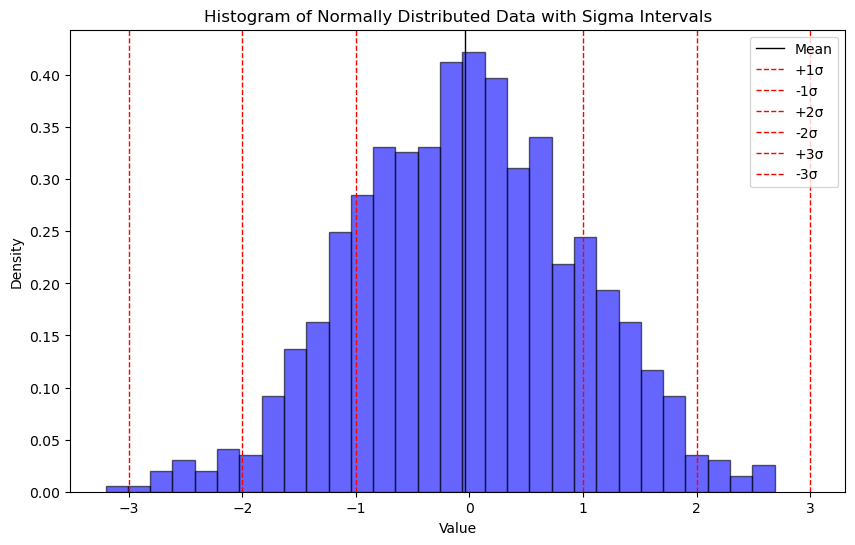

In [43]:
import numpy as np
import matplotlib.pyplot as plt

mean = 0
std_dev = 1
data = np.random.normal(mean, std_dev, 1000)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, alpha=0.6, color='blue', edgecolor='black', density=True)

# Mean line
plt.axvline(np.mean(data), color='black', linestyle='-', linewidth=1, label='Mean')

# Sigma intervals
for i in range(1, 4):
    plt.axvline(mean + i * std_dev, color='red', linestyle='--', linewidth=1, label=f'+{i}σ')
    plt.axvline(mean - i * std_dev, color='red', linestyle='--', linewidth=1, label=f'-{i}σ')

plt.title('Histogram of Normally Distributed Data with Sigma Intervals')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.show()


Check the Pareto rule for variables from the geometric distribution

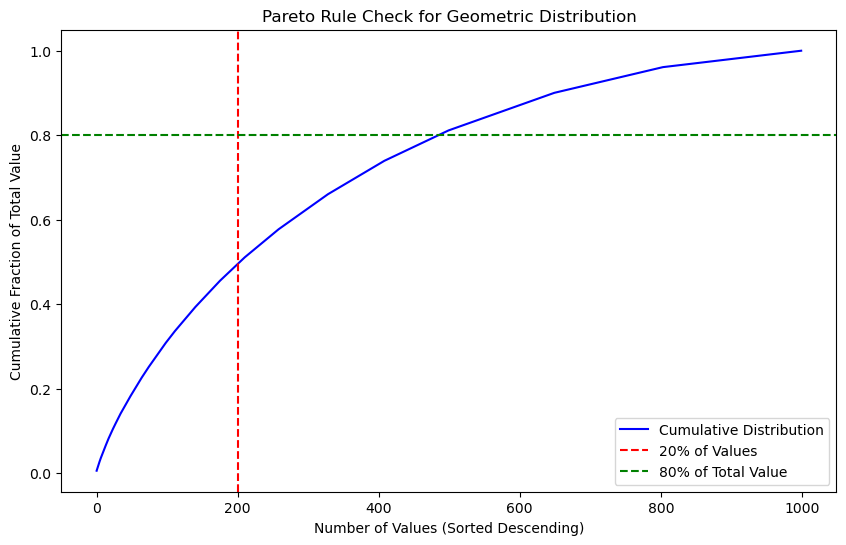

Top 20% of values contribute approximately 49.54% of the total value.


In [44]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.2
size = 1000  
data = np.random.geometric(p, size)

sorted_data = np.sort(data)[::-1]
total_sum = np.sum(sorted_data)

cumulative_sum = np.cumsum(sorted_data) / total_sum
cutoff_index = int(0.2 * len(sorted_data))  # 20% of data

plt.figure(figsize=(10, 6))
plt.plot(cumulative_sum, label='Cumulative Distribution', color='blue')
plt.axvline(cutoff_index, color='red', linestyle='--', label='20% of Values')
plt.axhline(0.8, color='green', linestyle='--', label='80% of Total Value')

plt.title('Pareto Rule Check for Geometric Distribution')
plt.xlabel('Number of Values (Sorted Descending)')
plt.ylabel('Cumulative Fraction of Total Value')
plt.legend()

plt.show()

top_20_contribution = cumulative_sum[cutoff_index] * 100
print(f"Top 20% of values contribute approximately {top_20_contribution:.2f}% of the total value.")


Draw a histogram with marked sigm intervals for variables drawn
from a continuous power distribution

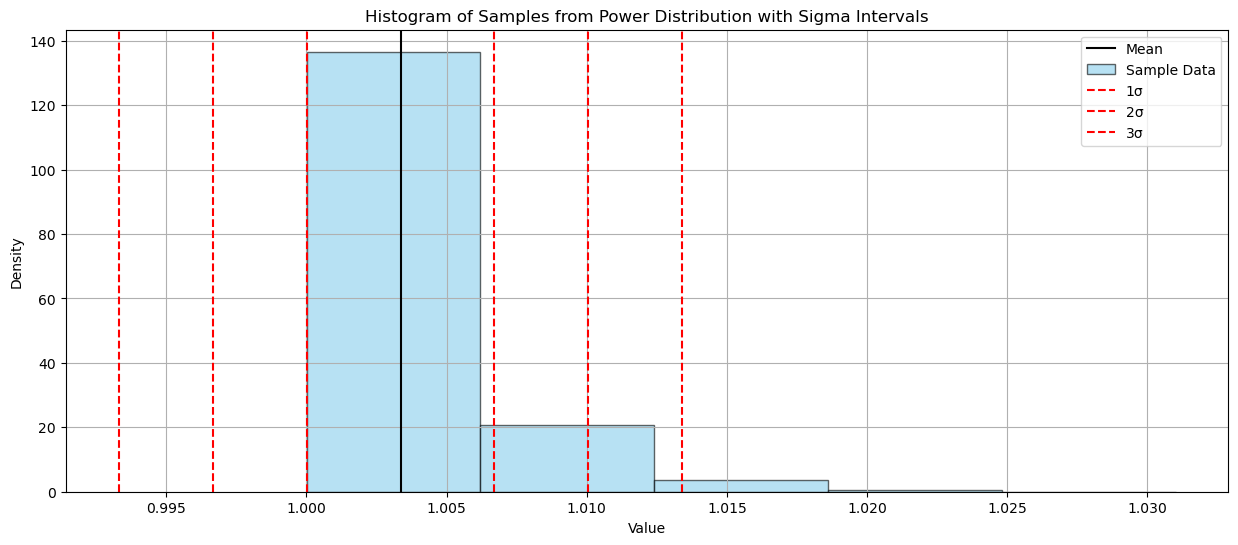

In [45]:
import numpy as np
import matplotlib.pyplot as plt

a = 300
xmin = 1
sample_size = 10000

def inverse_transform_sampling(a, xmin, sample_size):
    r = np.random.uniform(0, 1, sample_size)
    return xmin * (1 - r) ** (-1 / (a - 1))

samples = inverse_transform_sampling(a, xmin, sample_size)

mean = np.mean(samples)
std_dev = np.std(samples)

sigma_intervals = [mean - std_dev, mean + std_dev,
                   mean - 2 * std_dev, mean + 2 * std_dev,
                   mean - 3 * std_dev, mean + 3 * std_dev]

plt.figure(figsize=(15, 6))
plt.axvline(mean, color='black', label='Mean')
plt.hist(samples, bins=5, color='skyblue', edgecolor='black', density=True, alpha=0.6, label="Sample Data")

for i, sigma in enumerate(sigma_intervals):
    plt.axvline(sigma, color='red', linestyle='--', label=f"{i//2 + 1}σ" if i % 2 == 0 else "")

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of Samples from Power Distribution with Sigma Intervals")
plt.legend()
plt.grid(True)
plt.show()


Check the Pareto rule for variables from the zeta distribution

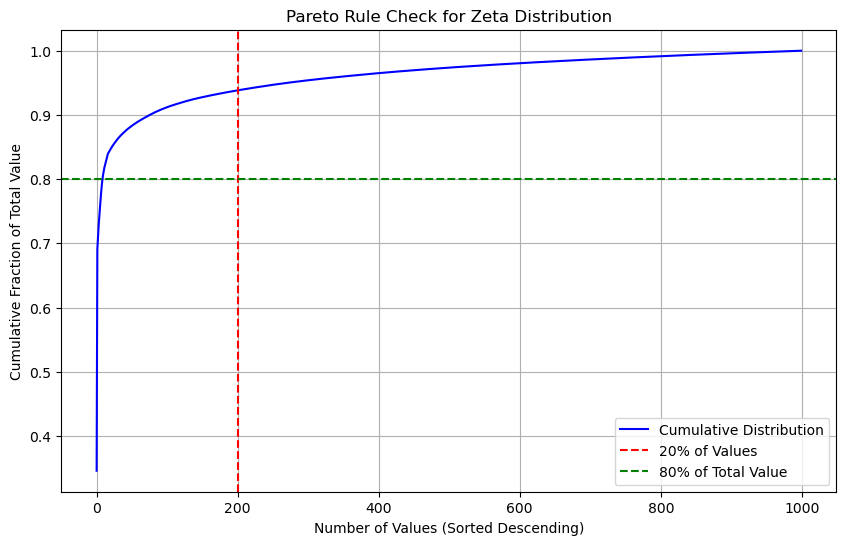

Top 20% of values contribute approximately 93.83% of the total value.


In [46]:
import numpy as np
import matplotlib.pyplot as plt

s = 2
size = 1000

def zeta_distribution_samples(s, size):
    random_uniform = np.random.uniform(0, 1, size)
    return (1 / (random_uniform ** (1 / (s - 1))))

data = zeta_distribution_samples(s, size)

sorted_data = np.sort(data)[::-1]
total_sum = np.sum(sorted_data)

cumulative_sum = np.cumsum(sorted_data) / total_sum
cutoff_index = int(0.2 * len(sorted_data))  # 20% of data

plt.figure(figsize=(10, 6))
plt.plot(cumulative_sum, label='Cumulative Distribution', color='blue')
plt.axvline(cutoff_index, color='red', linestyle='--', label='20% of Values')
plt.axhline(0.8, color='green', linestyle='--', label='80% of Total Value')

plt.title('Pareto Rule Check for Zeta Distribution')
plt.xlabel('Number of Values (Sorted Descending)')
plt.ylabel('Cumulative Fraction of Total Value')
plt.legend()
plt.grid(True)
plt.show()

top_20_contribution = cumulative_sum[cutoff_index] * 100
print(f"Top 20% of values contribute approximately {top_20_contribution:.2f}% of the total value.")


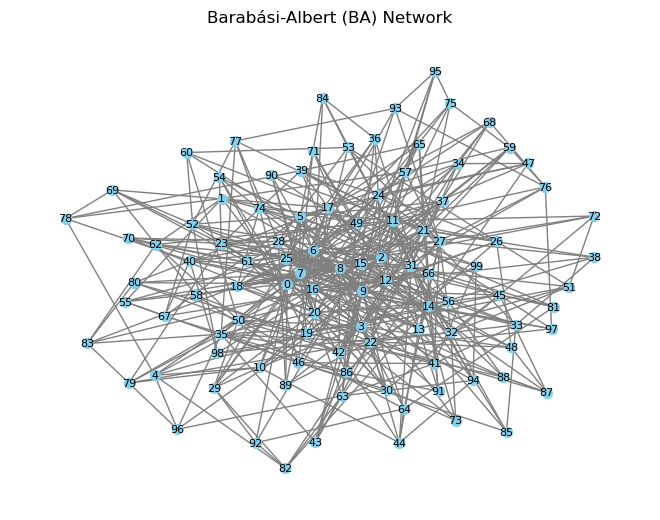

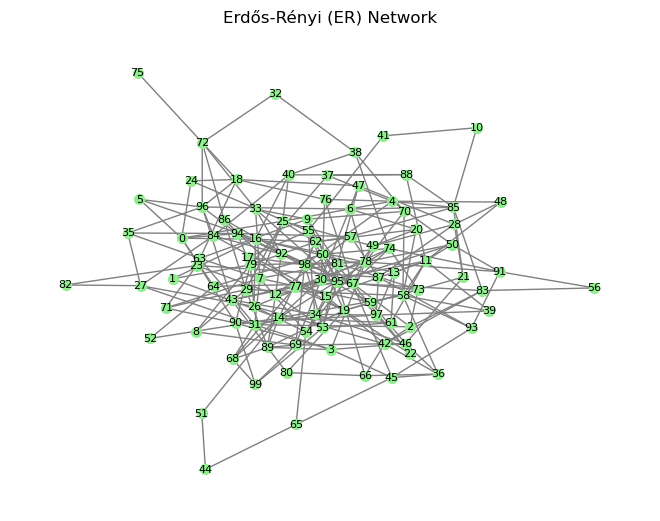

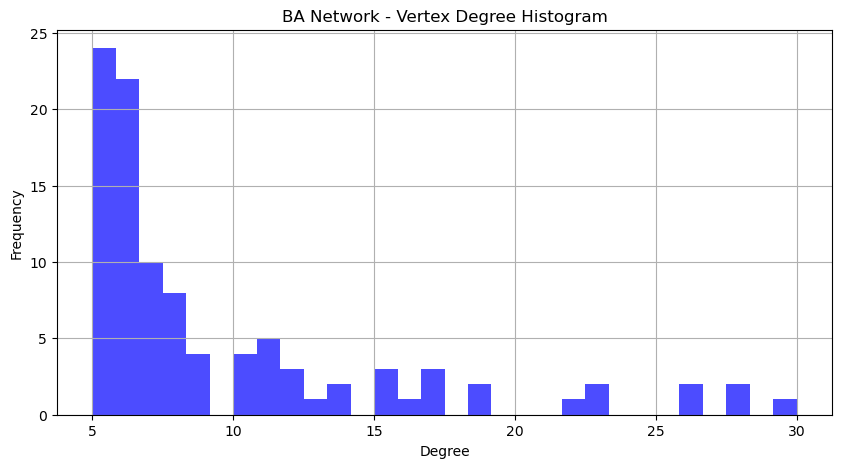

BA Network - Expectation (Mean Degree): 9.50
BA Network - Variance of Degree: 35.73
---


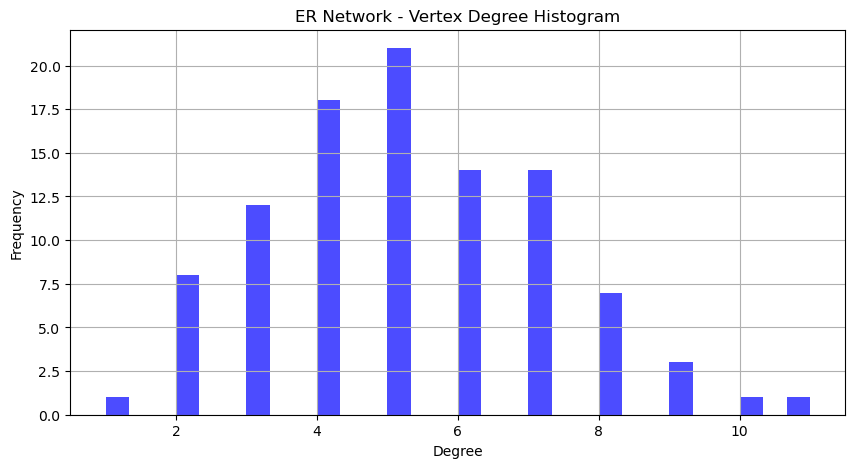

ER Network - Expectation (Mean Degree): 5.16
ER Network - Variance of Degree: 3.93
---


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def analyze_graph(graph, title):
    degrees = np.array([deg for node, deg in graph.degree()])
    
    plt.figure(figsize=(10, 5))
    plt.hist(degrees, bins=30, color='blue', alpha=0.7)
    plt.title(f'{title} - Vertex Degree Histogram')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()
    
    expectation = np.mean(degrees)
    variance = np.var(degrees)
    
    print(f'{title} - Expectation (Mean Degree): {expectation:.2f}')
    print(f'{title} - Variance of Degree: {variance:.2f}')
    print(f'---')

def analyze_networks(n=100, m=5):

    ba_graph = nx.barabasi_albert_graph(n, m)
    nx.draw(ba_graph, with_labels=True, node_color='skyblue', edge_color='gray', node_size=50, font_size=8)
    plt.title('Barabási-Albert (BA) Network')
    plt.show()

    er_graph = nx.erdos_renyi_graph(n, m/n)  # p = m/n
    nx.draw(er_graph, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=50, font_size=8)
    plt.title('Erdős-Rényi (ER) Network')
    plt.show()
    
    analyze_graph(ba_graph, 'BA Network')
    analyze_graph(er_graph, 'ER Network')

analyze_networks()


BA has hubs while ER is more uniformly distributed.

P3.1 Read documentation of the pre-defined graph layout functions
in your chosen environment. For the selected real graph, test
several visualization methods. [1.5P]

In [48]:
import pandas as pd
# Defining graph data
csv_file = 'witcher-data/witcher_small_network.csv'  # Replace with your actual file path
df = pd.read_csv(csv_file)

G = nx.Graph()

for index, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Weight']
    
    if G.has_edge(target, source):
        current_weight = G[target][source]['weight']
        if weight > current_weight:
            G[source][target]['weight'] = weight
    else:
        G.add_edge(source, target, weight=weight)

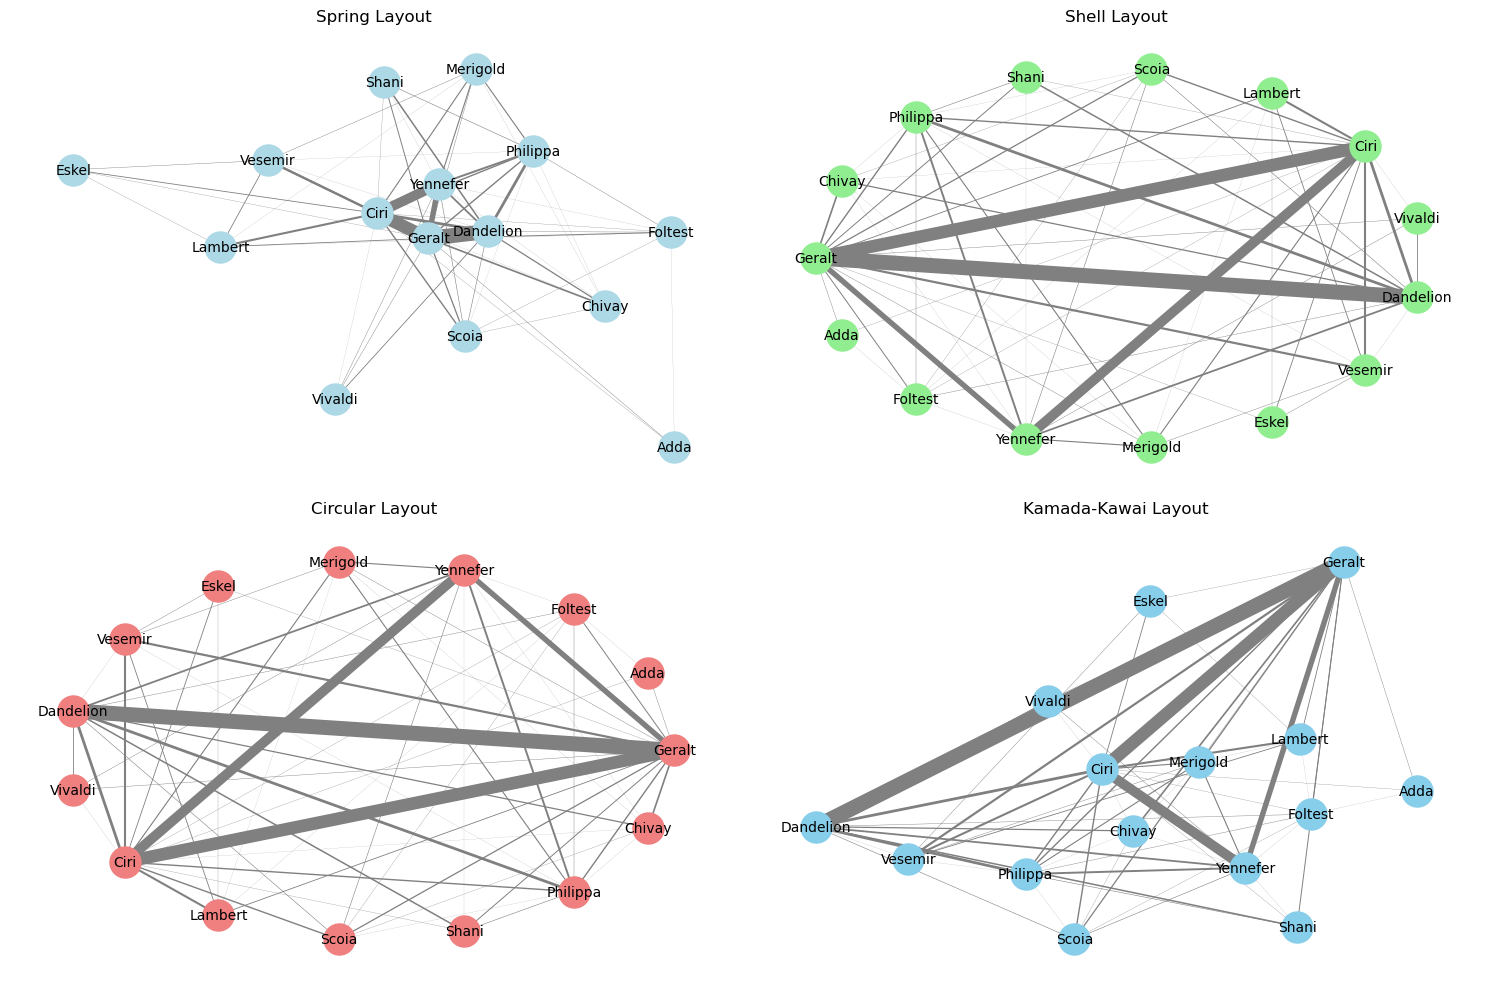

In [49]:
# Define a function to get edge widths based on weights
edge_widths = [d['weight'] * 0.1 for _, _, d in G.edges(data=True)]  # Adjust multiplier for width scaling

# Test several visualization methods
plt.figure(figsize=(15, 10))

# Spring layout
plt.subplot(221)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=edge_widths, node_size=500, font_size=10)
plt.title("Spring Layout")

# Shell layout
plt.subplot(222)
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', width=edge_widths, node_size=500, font_size=10)
plt.title("Shell Layout")

# Circular layout
plt.subplot(223)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightcoral', edge_color='gray', width=edge_widths, node_size=500, font_size=10)
plt.title("Circular Layout")

# Kamada-Kawai layout
plt.subplot(224)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', width=edge_widths, node_size=500, font_size=10)
plt.title("Kamada-Kawai Layout")

plt.tight_layout()
plt.show()